Модель Мальтуса

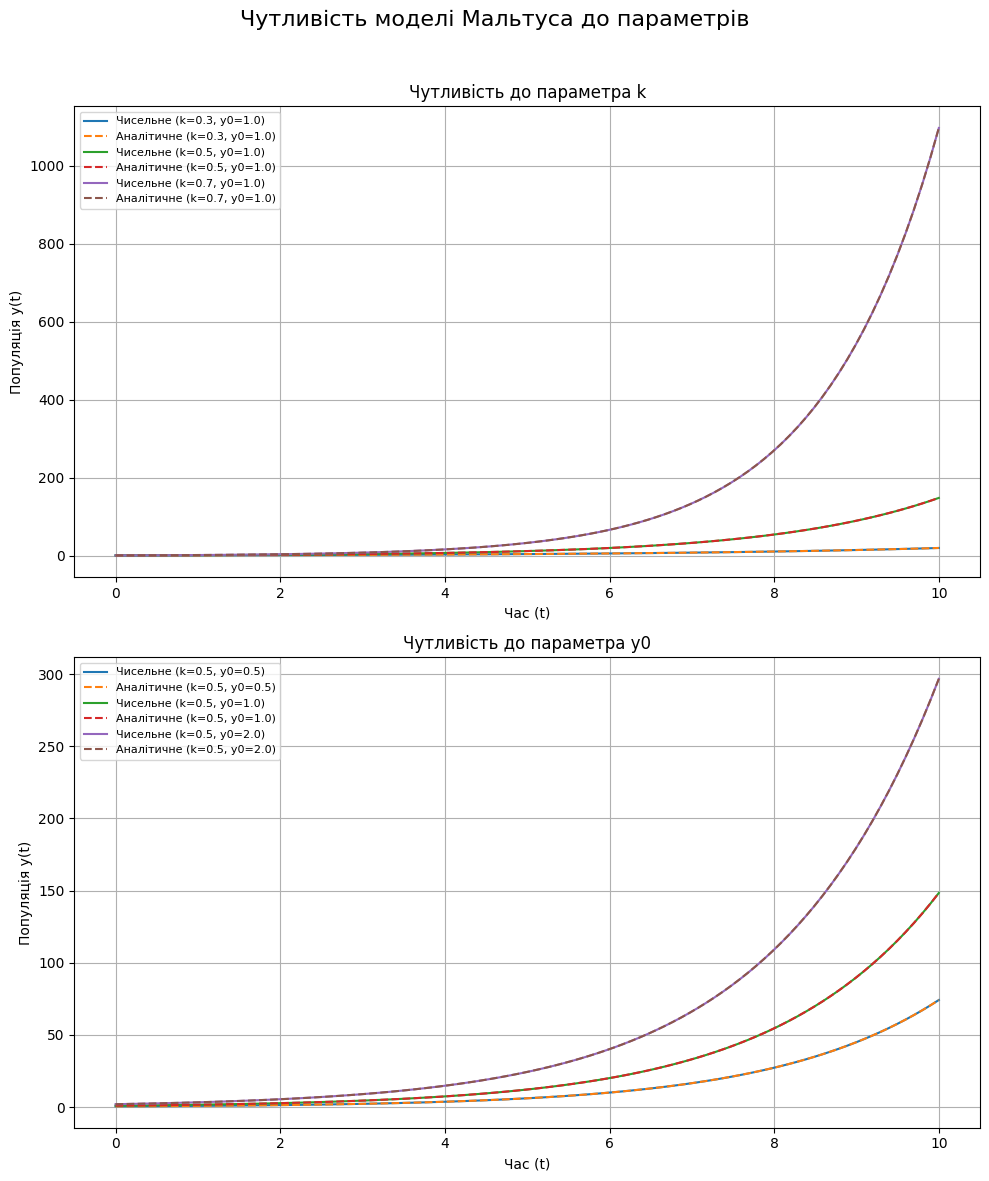

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі Мальтуса
base_params = {
    "k": 0.5,   # Коефіцієнт зростання
    "y0": 1.0   # Початкове значення популяції
}

# Проміжок часу для моделювання
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Функція моделі Мальтуса
def malthus_model(t, y, k):
    return k * y

# Аналітичний розв'язок
def analytical_solution(t, y0, k):
    return y0 * np.exp(k * t)

# Діапазони змін параметрів
param_variations = {
    "k": [0.3, base_params["k"], 0.7],  # Менший, стандартний, більший
    "y0": [0.5, base_params["y0"], 2.0]  # Менший, стандартний, більший
}

# Побудова графіків
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle("Чутливість моделі Мальтуса до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax_time = axes[i]  # Графік динаміки популяції

    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Чисельне рішення
        solution = solve_ivp(
            malthus_model, t_span, [params["y0"]], t_eval=t_eval,
            args=(params["k"],)
        )

        # Аналітичний розв'язок
        analytical = analytical_solution(t_eval, params["y0"], params["k"])

        # Текст для легенди
        legend_text = f"k={params['k']}, y0={params['y0']}"

        # Графік чисельного та аналітичного розв'язку
        ax_time.plot(solution.t, solution.y[0], label=f"Чисельне ({legend_text})")
        ax_time.plot(t_eval, analytical, '--', label=f"Аналітичне ({legend_text})")

    # Налаштування графіку
    ax_time.set_title(f"Чутливість до параметра {param}")
    ax_time.set_xlabel("Час (t)")
    ax_time.set_ylabel("Популяція y(t)")
    ax_time.legend(fontsize=8)
    ax_time.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Логістична модель

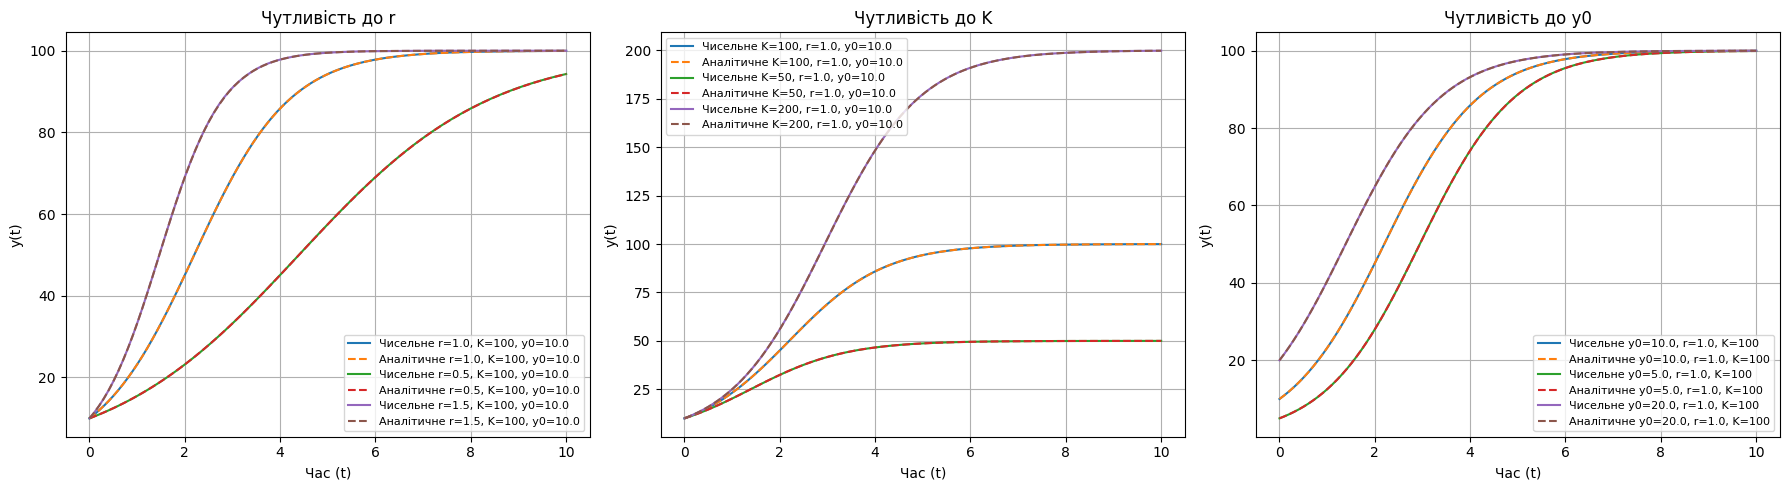

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Логістична модель
def logistic_model(t, y, r, K):
    """
    Логістична модель росту популяції:
    dy/dt = r * y * (1 - y / K)

    Параметри:
    - r: швидкість зростання
    - K: місткість середовища
    """
    return r * y * (1 - y / K)

# Функція для розв'язання та побудови графіків
def solve_and_plot(r_values, K_values, y0_values, t_span=(0, 10), t_points=100):
    """
    Побудова графіків чисельних та аналітичних розв'язків логістичної моделі
    для різних значень параметрів r, K та y0.

    Параметри:
    - r_values: список значень r (швидкість зростання)
    - K_values: список значень K (місткість середовища)
    - y0_values: список початкових значень y0
    - t_span: часовий проміжок
    - t_points: кількість точок для часової сітки
    """
    t_eval = np.linspace(t_span[0], t_span[1], t_points)

    # Налаштування фігури з трьома графіками
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Базові значення параметрів
    default_y0 = y0_values[0]
    default_r = r_values[0]
    default_K = K_values[0]

    # Графік 1: Чутливість до r
    for r in r_values:
        sol = solve_ivp(logistic_model, t_span, [default_y0], args=(r, default_K), t_eval=t_eval)
        analytical_solution = default_K / (1 + ((default_K - default_y0) / default_y0) * np.exp(-r * t_eval))
        axs[0].plot(sol.t, sol.y[0], label=f"Чисельне r={r}, K={default_K}, y0={default_y0}")
        axs[0].plot(t_eval, analytical_solution, '--', label=f"Аналітичне r={r}, K={default_K}, y0={default_y0}")

    axs[0].set_xlabel("Час (t)")
    axs[0].set_ylabel("y(t)")
    axs[0].set_title("Чутливість до r")
    axs[0].legend(fontsize=8)
    axs[0].grid(True)

    # Графік 2: Чутливість до K
    for K in K_values:
        sol = solve_ivp(logistic_model, t_span, [default_y0], args=(default_r, K), t_eval=t_eval)
        analytical_solution = K / (1 + ((K - default_y0) / default_y0) * np.exp(-default_r * t_eval))
        axs[1].plot(sol.t, sol.y[0], label=f"Чисельне K={K}, r={default_r}, y0={default_y0}")
        axs[1].plot(t_eval, analytical_solution, '--', label=f"Аналітичне K={K}, r={default_r}, y0={default_y0}")

    axs[1].set_xlabel("Час (t)")
    axs[1].set_ylabel("y(t)")
    axs[1].set_title("Чутливість до K")
    axs[1].legend(fontsize=8)
    axs[1].grid(True)

    # Графік 3: Чутливість до y0
    for y0 in y0_values:
        sol = solve_ivp(logistic_model, t_span, [y0], args=(default_r, default_K), t_eval=t_eval)
        analytical_solution = default_K / (1 + ((default_K - y0) / y0) * np.exp(-default_r * t_eval))
        axs[2].plot(sol.t, sol.y[0], label=f"Чисельне y0={y0}, r={default_r}, K={default_K}")
        axs[2].plot(t_eval, analytical_solution, '--', label=f"Аналітичне y0={y0}, r={default_r}, K={default_K}")

    axs[2].set_xlabel("Час (t)")
    axs[2].set_ylabel("y(t)")
    axs[2].set_title("Чутливість до y0")
    axs[2].legend(fontsize=8)
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

# Набір параметрів для аналізу
r_values = [1.0, 0.5, 1.5]  # Швидкість зростання популяції
K_values = [100, 50, 200]   # Місткість середовища
y0_values = [10.0, 5.0, 20.0]  # Початкове значення популяції

# Виклик функції для побудови графіків
solve_and_plot(r_values, K_values, y0_values)


Модель Лотка–Вольтера

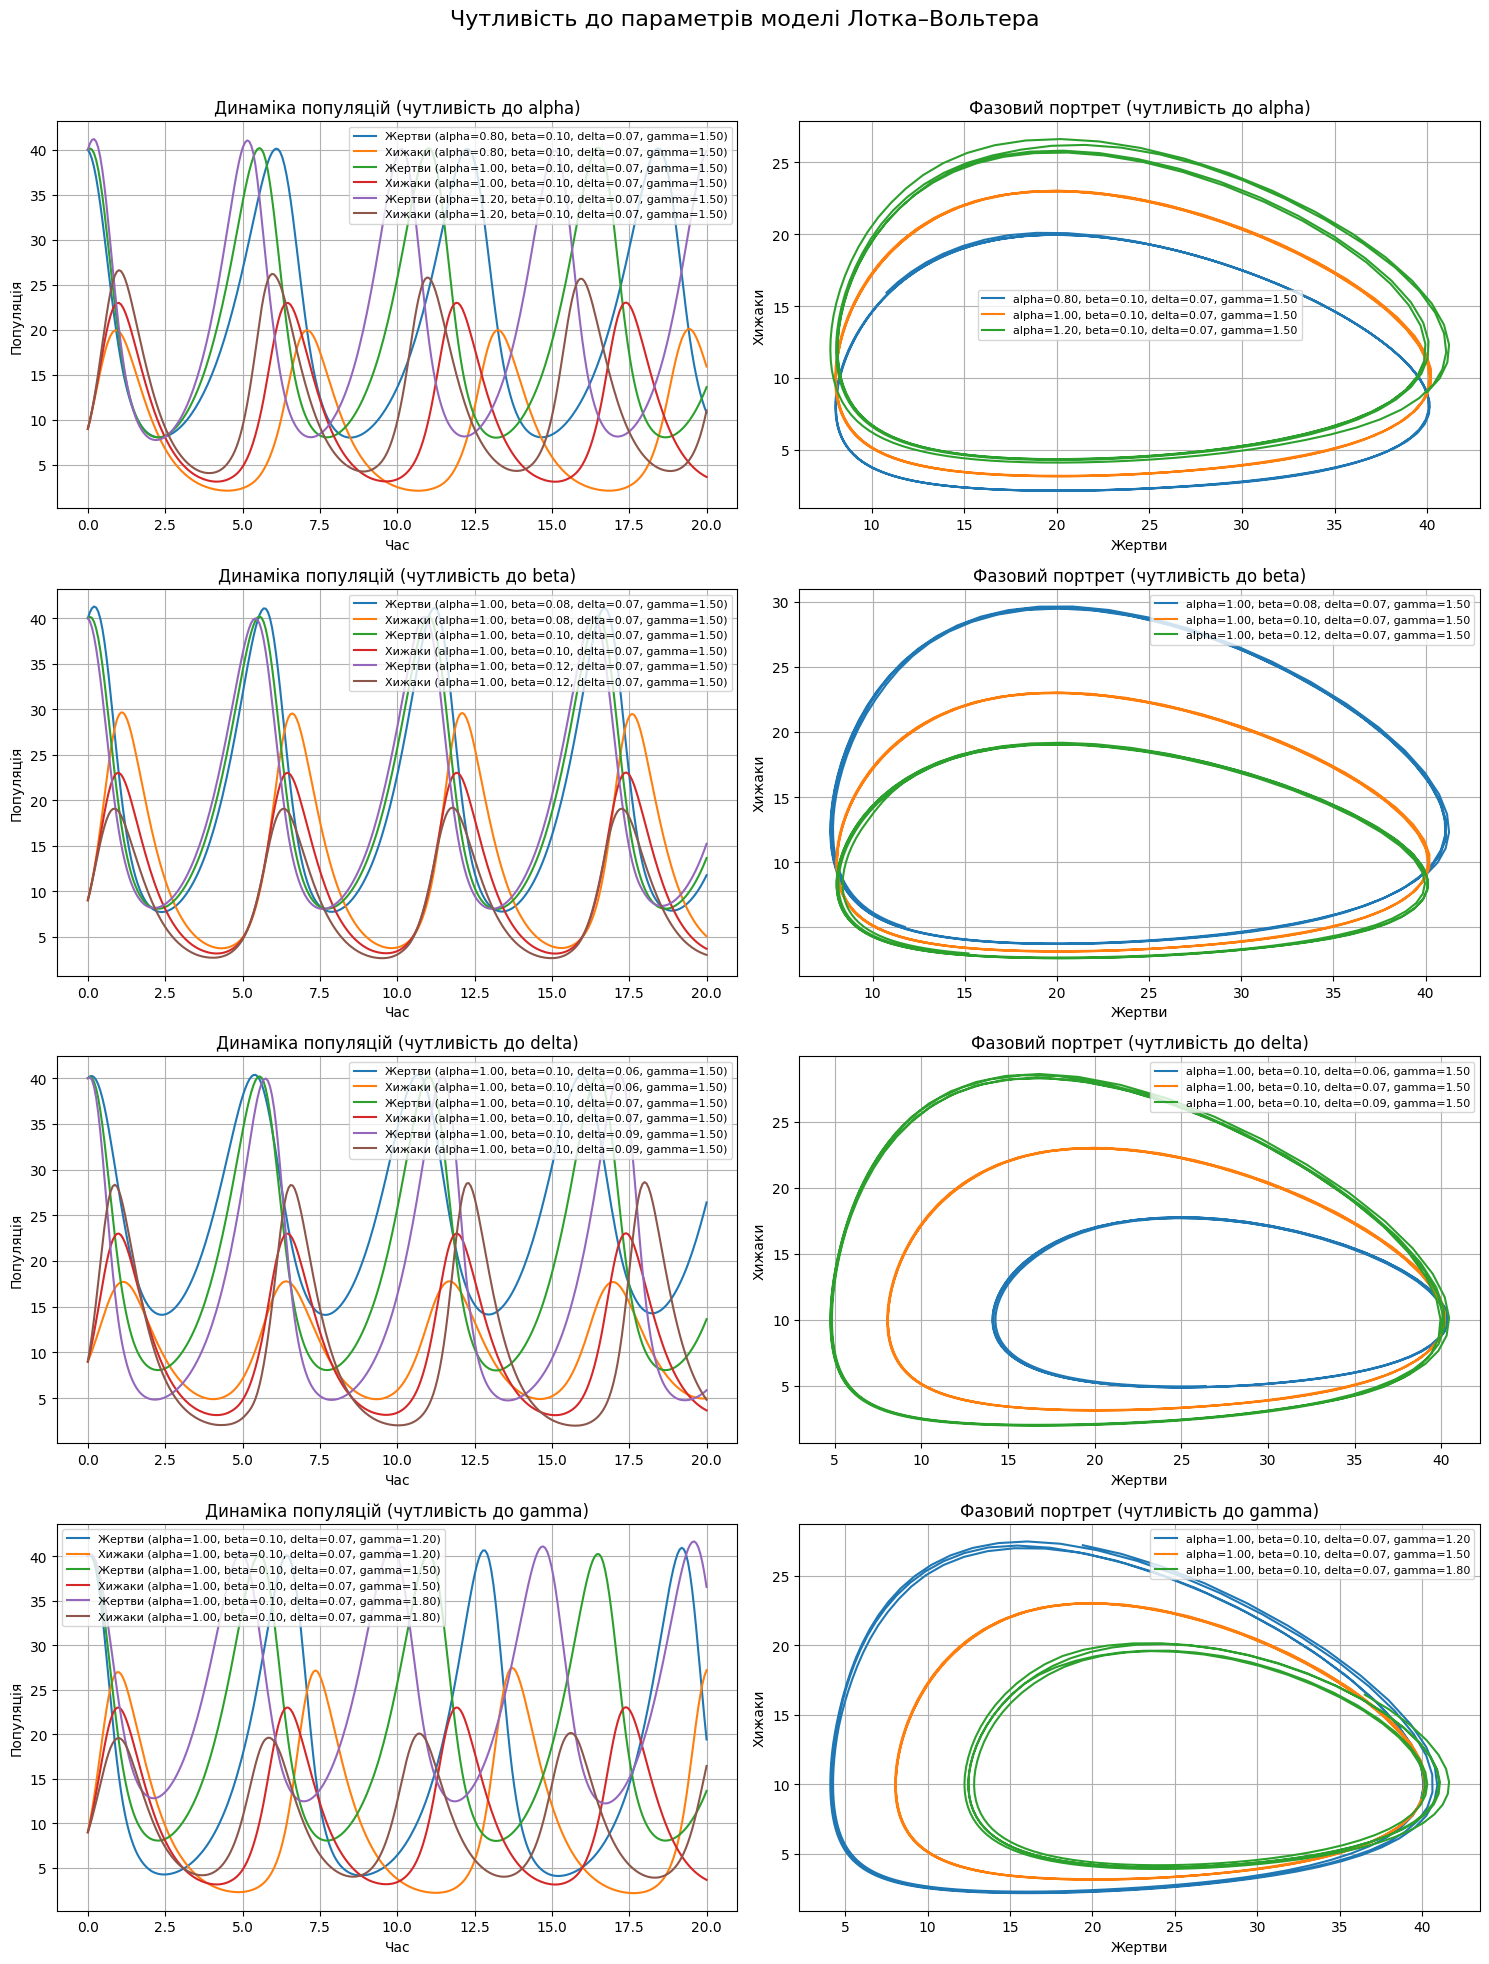

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі Лотка–Вольтера
base_params = {
    "alpha": 1.0,  # Зростання жертв
    "beta": 0.1,   # Хижацтво
    "delta": 0.075,  # Приріст хижаків
    "gamma": 1.5   # Смертність хижаків
}

# Початкові умови
x0 = 40.0  # Жертви
y0 = 9.0   # Хижаки

# Проміжок часу
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Функція для моделі Лотка–Вольтера
def lotka_volterra_model(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Діапазони параметрів (зменшене, стандартне, збільшене)
param_variations = {
    "alpha": [0.8 * base_params["alpha"], base_params["alpha"], 1.2 * base_params["alpha"]],
    "beta": [0.8 * base_params["beta"], base_params["beta"], 1.2 * base_params["beta"]],
    "delta": [0.8 * base_params["delta"], base_params["delta"], 1.2 * base_params["delta"]],
    "gamma": [0.8 * base_params["gamma"], base_params["gamma"], 1.2 * base_params["gamma"]]
}

# Побудова графіків
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle("Чутливість до параметрів моделі Лотка–Вольтера", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    for j, value in enumerate(values):
        # Оновлюємо параметри
        params = base_params.copy()
        params[param] = value

        # Розв'язок системи
        solution = solve_ivp(
            lotka_volterra_model, t_span, [x0, y0], t_eval=t_eval,
            args=(params["alpha"], params["beta"], params["delta"], params["gamma"])
        )

        # Текст для легенди з усіма параметрами
        legend_text = (
            f"alpha={params['alpha']:.2f}, "
            f"beta={params['beta']:.2f}, "
            f"delta={params['delta']:.2f}, "
            f"gamma={params['gamma']:.2f}"
        )

        # Графік популяцій від часу
        ax = axes[i, 0]
        ax.plot(solution.t, solution.y[0], label=f"Жертви ({legend_text})")
        ax.plot(solution.t, solution.y[1], label=f"Хижаки ({legend_text})")
        ax.set_title(f"Динаміка популяцій (чутливість до {param})")
        ax.set_xlabel("Час")
        ax.set_ylabel("Популяція")
        ax.legend(fontsize=8)
        ax.grid(True)

        # Фазовий портрет
        ax = axes[i, 1]
        ax.plot(solution.y[0], solution.y[1], label=legend_text)
        ax.set_title(f"Фазовий портрет (чутливість до {param})")
        ax.set_xlabel("Жертви")
        ax.set_ylabel("Хижаки")
        ax.legend(fontsize=8)
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Модель EOQ

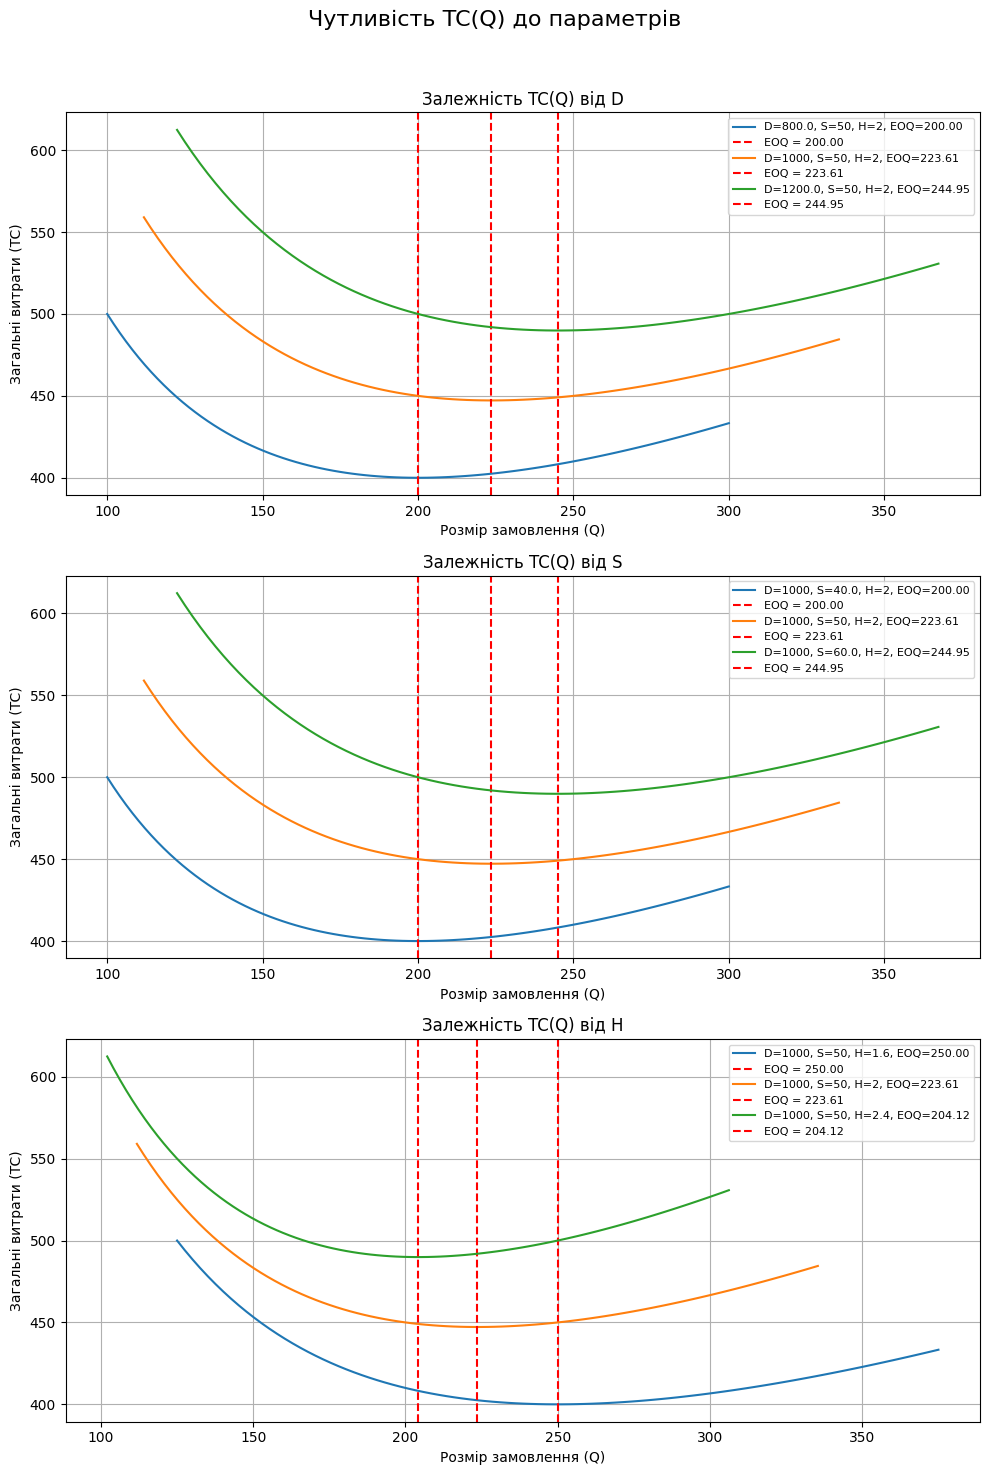

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Базові параметри моделі EOQ
base_params = {
    "D": 1000,  # Щорічний попит
    "S": 50,    # Вартість оформлення одного замовлення
    "H": 2      # Вартість зберігання одиниці товару
}

# Формули для EOQ і загальних витрат
def compute_eoq(D, S, H):
    return math.sqrt((2 * D * S) / H)

def total_cost(Q, D, S, H):
    return (D / Q) * S + (Q / 2) * H

# Діапазони змін параметрів
param_variations = {
    "D": [0.8 * base_params["D"], base_params["D"], 1.2 * base_params["D"]],
    "S": [0.8 * base_params["S"], base_params["S"], 1.2 * base_params["S"]],
    "H": [0.8 * base_params["H"], base_params["H"], 1.2 * base_params["H"]]
}

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Чутливість TC(Q) до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]
    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Обчислення EOQ
        eoq = compute_eoq(params["D"], params["S"], params["H"])

        # Генерація значень Q і TC
        Q_values = np.linspace(eoq * 0.5, eoq * 1.5, 100)
        TC_values = np.array([total_cost(Q, params["D"], params["S"], params["H"]) for Q in Q_values])

        # Текст для легенди
        legend_text = (
            f"D={params['D']}, S={params['S']}, H={params['H']}, EOQ={eoq:.2f}"
        )

        # Графік залежності TC(Q)
        ax.plot(Q_values, TC_values, label=legend_text)
        ax.axvline(x=eoq, color='r', linestyle='--', label=f'EOQ = {eoq:.2f}')

    ax.set_title(f"Залежність TC(Q) від {param}")
    ax.set_xlabel("Розмір замовлення (Q)")
    ax.set_ylabel("Загальні витрати (TC)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Модель попиту і пропозиції

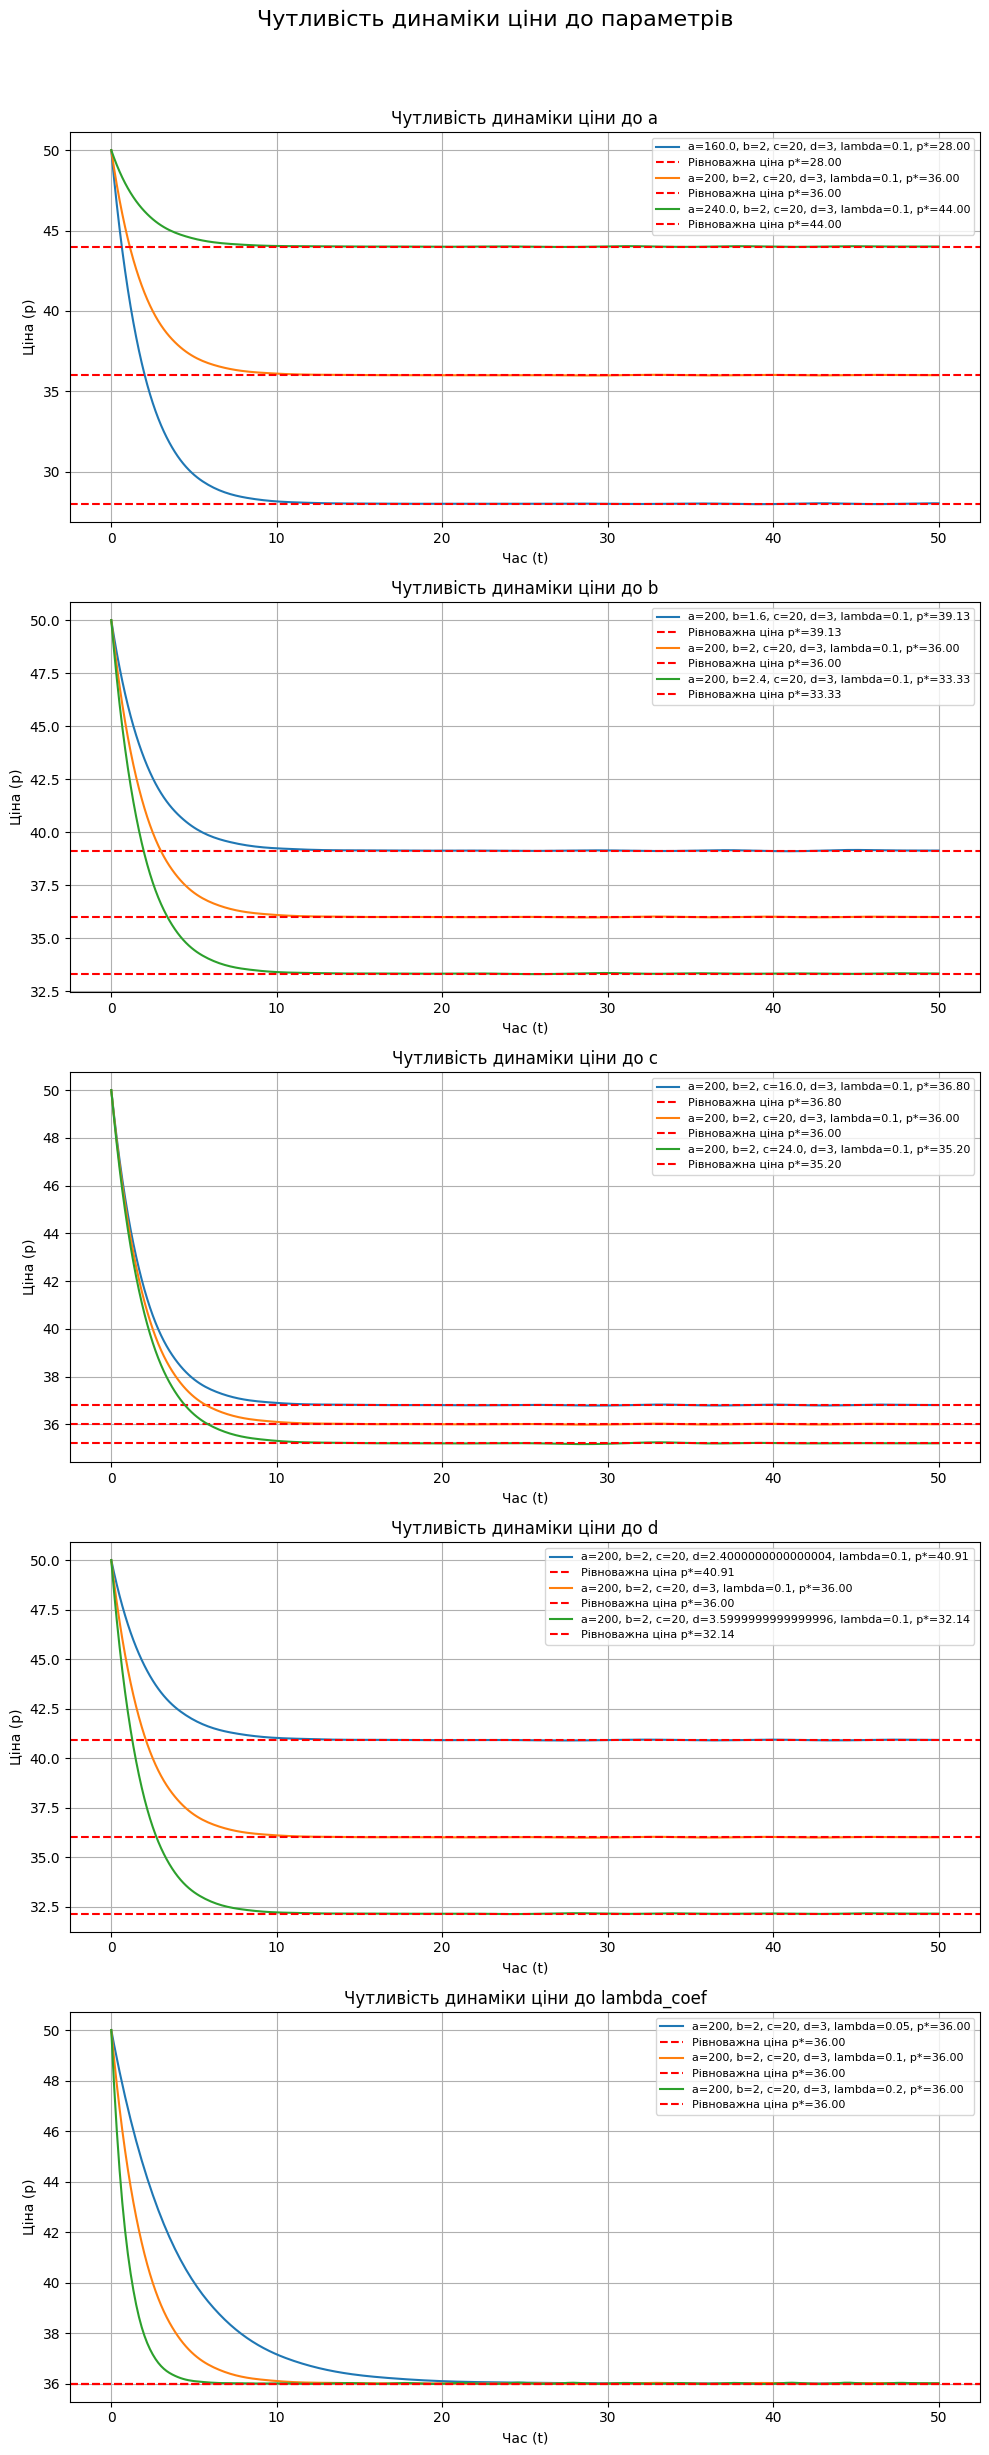

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі попиту і пропозиції
base_params = {
    "a": 200,  # Максимальний попит при нульовій ціні
    "b": 2,    # Коефіцієнт зниження попиту при зростанні ціни
    "c": 20,   # Базова кількість товару, що пропонується при нульовій ціні
    "d": 3,    # Коефіцієнт зростання пропозиції при зростанні ціни
    "lambda_coef": 0.1,  # Коефіцієнт корекції ціни
    "p0": 50   # Початкова ціна
}

# Проміжок часу для моделювання
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Функції попиту та пропозиції
def demand(p, a, b):
    return a - b * p

def supply(p, c, d):
    return c + d * p

# Диференціальне рівняння для динаміки ціни
def price_dynamics(t, p, a, b, c, d, lambda_coef):
    current_p = p[0]
    dpdt = lambda_coef * (demand(current_p, a, b) - supply(current_p, c, d))
    return [dpdt]

# Діапазони змін параметрів (включаючи lambda_coef)
param_variations = {
    "a": [0.8 * base_params["a"], base_params["a"], 1.2 * base_params["a"]],
    "b": [0.8 * base_params["b"], base_params["b"], 1.2 * base_params["b"]],
    "c": [0.8 * base_params["c"], base_params["c"], 1.2 * base_params["c"]],
    "d": [0.8 * base_params["d"], base_params["d"], 1.2 * base_params["d"]],
    "lambda_coef": [0.5 * base_params["lambda_coef"], base_params["lambda_coef"], 2 * base_params["lambda_coef"]]
}

# Побудова графіків
fig, axes = plt.subplots(5, 1, figsize=(10, 25))
fig.suptitle("Чутливість динаміки ціни до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]
    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Рівноважна ціна
        p_equilibrium = (params["a"] - params["c"]) / (params["b"] + params["d"])

        # Чисельне рішення
        solution = solve_ivp(
            price_dynamics, t_span, [params["p0"]], t_eval=t_eval,
            args=(params["a"], params["b"], params["c"], params["d"], params["lambda_coef"])
        )

        # Текст для легенди
        legend_text = (
            f"a={params['a']}, b={params['b']}, c={params['c']}, d={params['d']}, "
            f"lambda={params['lambda_coef']}, p*={p_equilibrium:.2f}"
        )

        # Графік динаміки ціни
        ax.plot(solution.t, solution.y[0], label=legend_text)
        ax.axhline(y=p_equilibrium, color='r', linestyle='--', label=f'Рівноважна ціна p*={p_equilibrium:.2f}')

    ax.set_title(f"Чутливість динаміки ціни до {param}")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("Ціна (p)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Модель прогнозування інвестицій

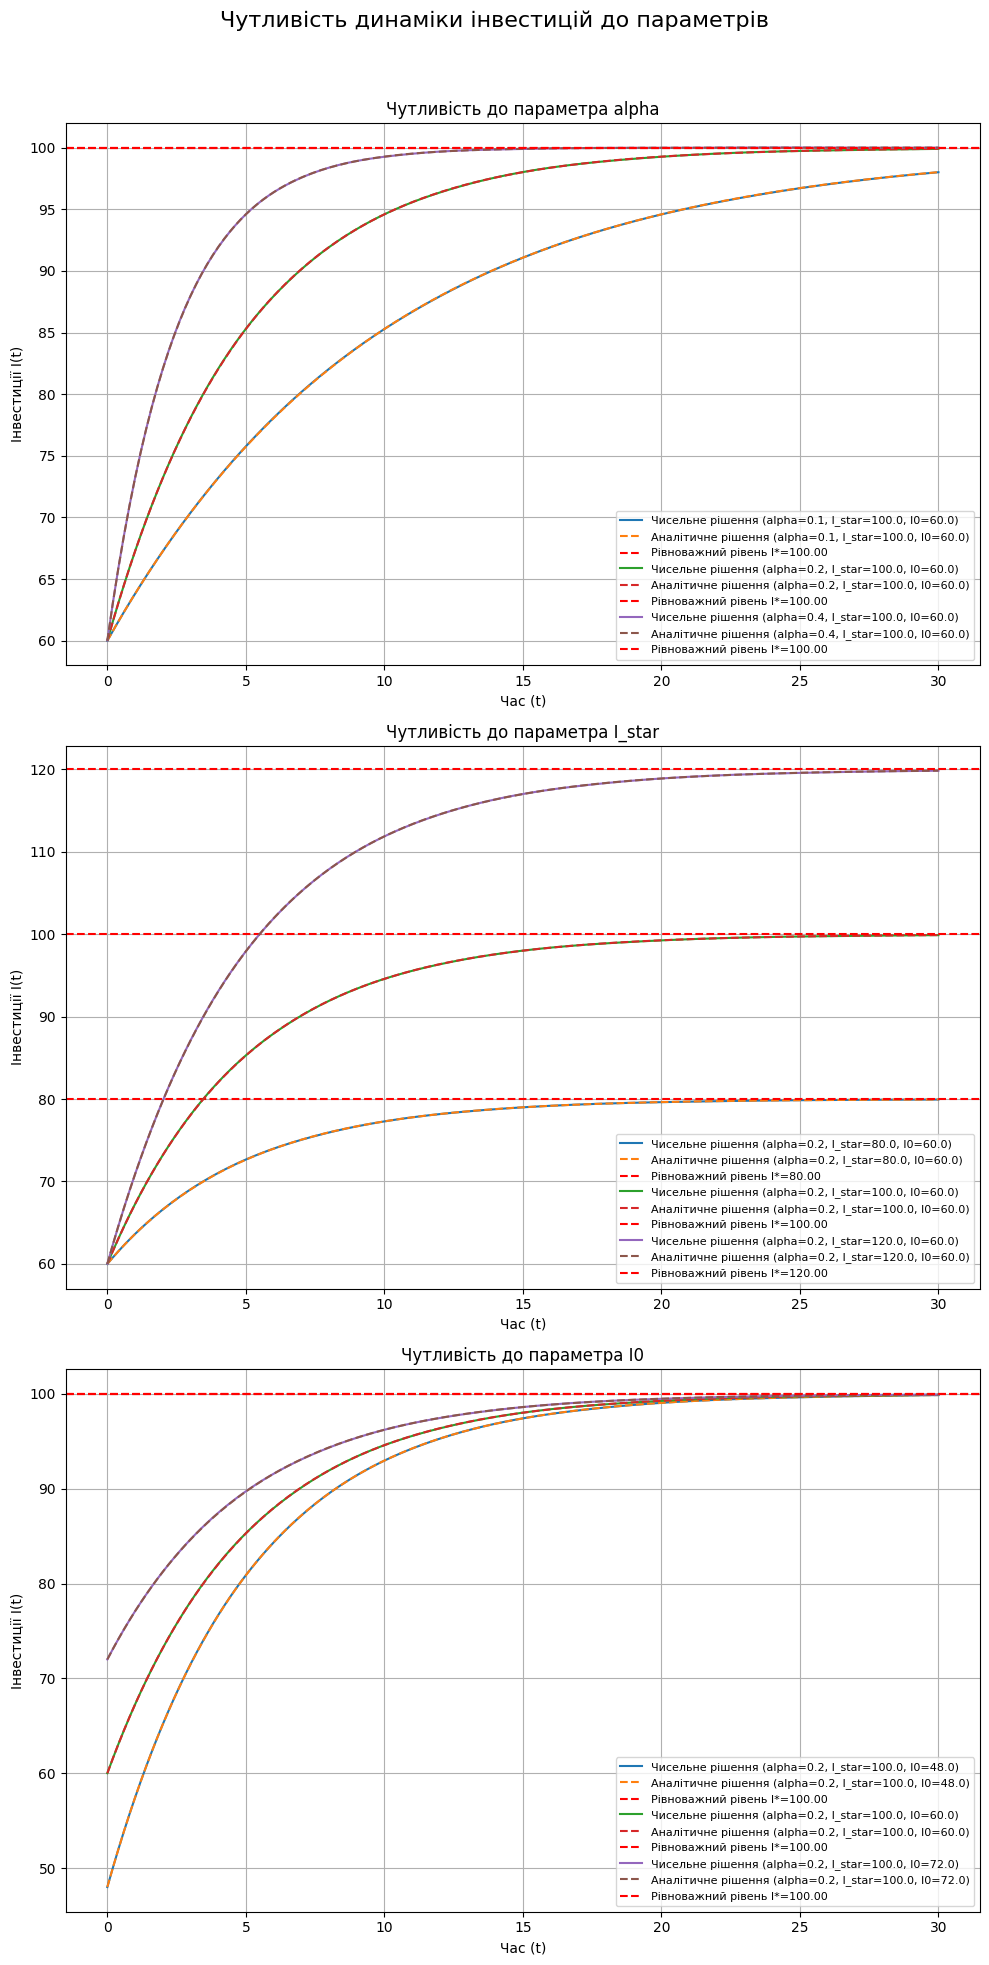

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі прогнозування інвестицій
base_params = {
    "alpha": 0.2,  # Коефіцієнт швидкості корекції інвестицій
    "I_star": 100.0,  # Рівноважний рівень інвестицій
    "I0": 60.0  # Початковий рівень інвестицій
}

# Проміжок часу для моделювання
t_span = (0, 30)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Диференціальне рівняння для моделі інвестицій
def investment_model(t, I, alpha, I_star):
    current_I = I[0]
    dIdt = alpha * (I_star - current_I)
    return [dIdt]

# Аналітичне рішення
def analytical_investment(t, I0, I_star, alpha):
    return I_star - (I_star - I0) * np.exp(-alpha * t)

# Діапазони змін параметрів
param_variations = {
    "alpha": [0.5 * base_params["alpha"], base_params["alpha"], 2 * base_params["alpha"]],
    "I_star": [0.8 * base_params["I_star"], base_params["I_star"], 1.2 * base_params["I_star"]],
    "I0": [0.8 * base_params["I0"], base_params["I0"], 1.2 * base_params["I0"]]
}

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Чутливість динаміки інвестицій до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax = axes[i]
    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Чисельне рішення
        solution = solve_ivp(
            investment_model, t_span, [params["I0"]], t_eval=t_eval,
            args=(params["alpha"], params["I_star"])
        )

        # Аналітичне рішення
        analytical_solution = analytical_investment(t_eval, params["I0"], params["I_star"], params["alpha"])

        # Текст для легенди
        legend_text = (
            f"alpha={params['alpha']}, I_star={params['I_star']}, I0={params['I0']}"
        )

        # Графік чисельного та аналітичного розв'язку
        ax.plot(solution.t, solution.y[0], label=f"Чисельне рішення ({legend_text})")
        ax.plot(t_eval, analytical_solution, '--', label=f"Аналітичне рішення ({legend_text})")
        ax.axhline(y=params["I_star"], color='r', linestyle='--', label=f'Рівноважний рівень I*={params["I_star"]:.2f}')

    ax.set_title(f"Чутливість до параметра {param}")
    ax.set_xlabel("Час (t)")
    ax.set_ylabel("Інвестиції I(t)")
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Модель міграції

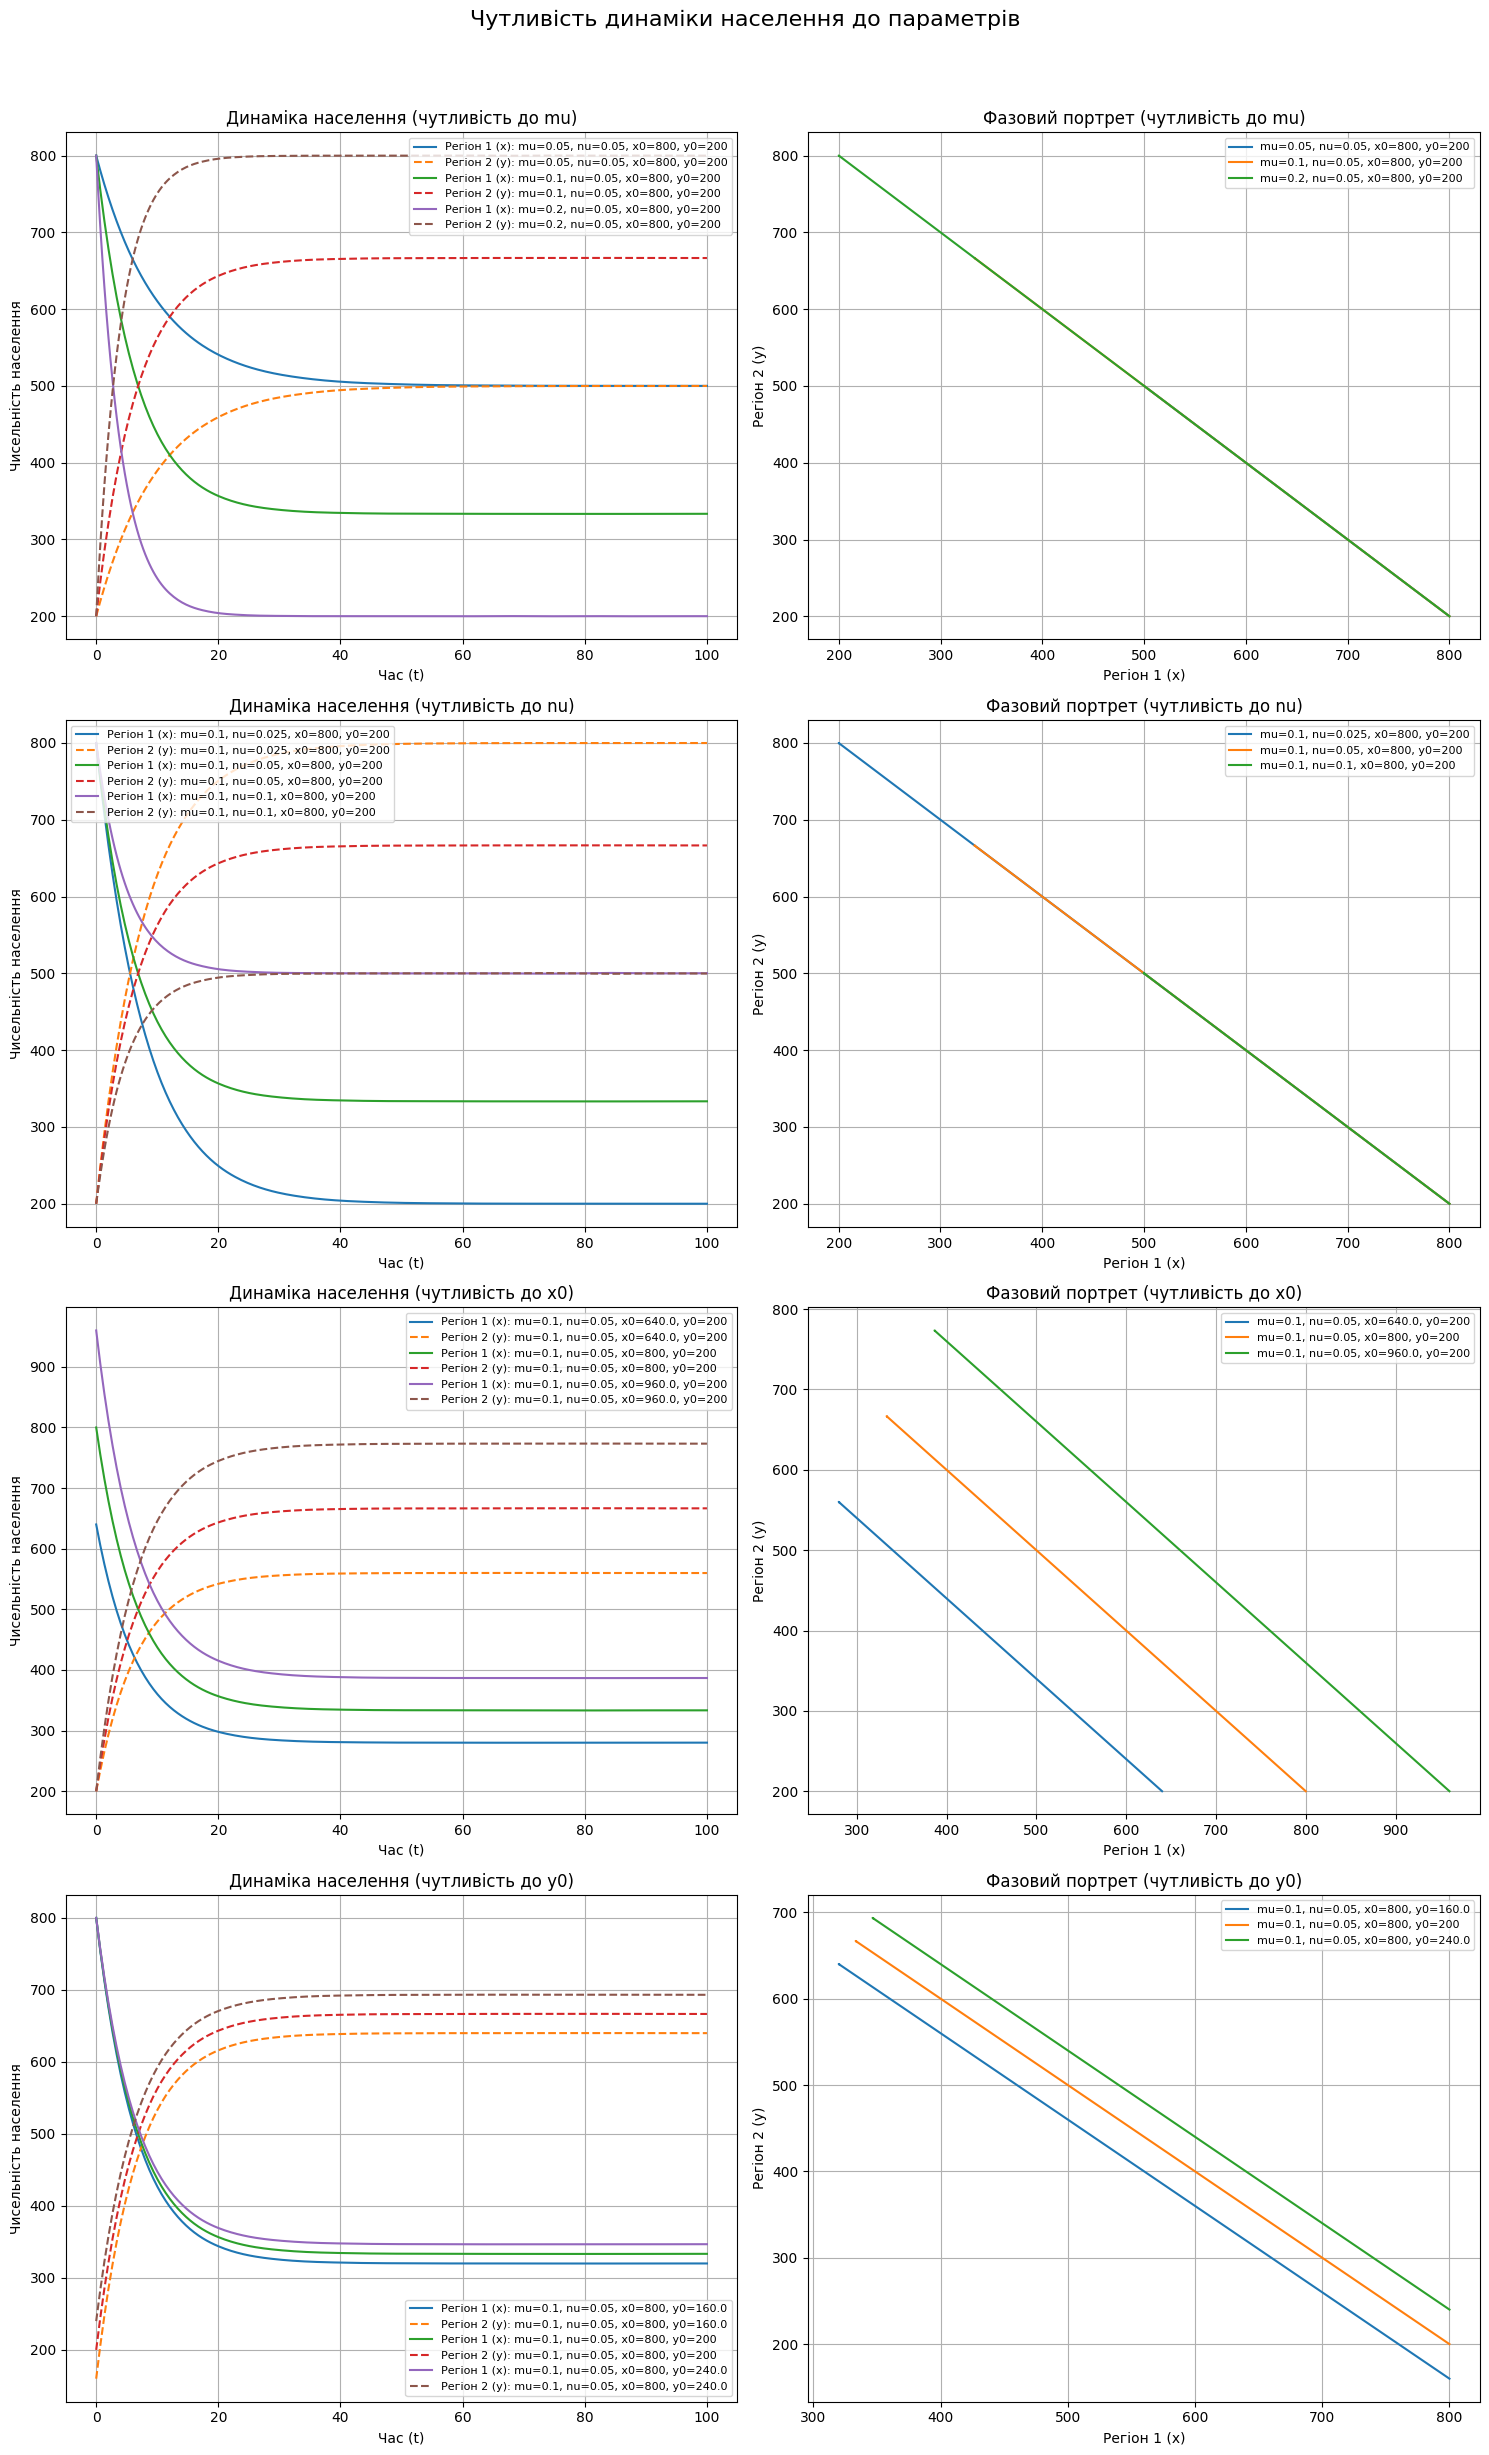

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі міграції
base_params = {
    "mu": 0.1,  # Швидкість міграції з регіону 1 до регіону 2
    "nu": 0.05,  # Швидкість міграції з регіону 2 до регіону 1
    "x0": 800,  # Початкова чисельність населення регіону 1
    "y0": 200   # Початкова чисельність населення регіону 2
}

# Загальна чисельність населення
N = base_params["x0"] + base_params["y0"]

# Проміжок часу для моделювання
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Система диференціальних рівнянь для моделі міграції
def migration_model(t, populations, mu, nu):
    x, y = populations
    dxdt = -mu * x + nu * y
    dydt = mu * x - nu * y
    return [dxdt, dydt]

# Діапазони змін параметрів
param_variations = {
    "mu": [0.5 * base_params["mu"], base_params["mu"], 2 * base_params["mu"]],
    "nu": [0.5 * base_params["nu"], base_params["nu"], 2 * base_params["nu"]],
    "x0": [0.8 * base_params["x0"], base_params["x0"], 1.2 * base_params["x0"]],
    "y0": [0.8 * base_params["y0"], base_params["y0"], 1.2 * base_params["y0"]]
}

# Побудова графіків
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
fig.suptitle("Чутливість динаміки населення до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax_time = axes[i, 0]  # Графік динаміки
    ax_phase = axes[i, 1]  # Фазовий портрет

    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Початкові умови для чисельності населення
        initial_conditions = [params["x0"], params["y0"]]

        # Чисельне рішення
        solution = solve_ivp(
            migration_model, t_span, initial_conditions, t_eval=t_eval,
            args=(params["mu"], params["nu"])
        )

        # Текст для легенди
        legend_text = (
            f"mu={params['mu']}, nu={params['nu']}, x0={params['x0']}, y0={params['y0']}"
        )

        # Графік динаміки населення
        ax_time.plot(solution.t, solution.y[0], label=f"Регіон 1 (x): {legend_text}")
        ax_time.plot(solution.t, solution.y[1], linestyle='--', label=f"Регіон 2 (y): {legend_text}")

        # Фазовий портрет
        ax_phase.plot(solution.y[0], solution.y[1], label=legend_text)

    # Налаштування графіку динаміки
    ax_time.set_title(f"Динаміка населення (чутливість до {param})")
    ax_time.set_xlabel("Час (t)")
    ax_time.set_ylabel("Чисельність населення")
    ax_time.legend(fontsize=8)
    ax_time.grid(True)

    # Налаштування фазового портрету
    ax_phase.set_title(f"Фазовий портрет (чутливість до {param})")
    ax_phase.set_xlabel("Регіон 1 (x)")
    ax_phase.set_ylabel("Регіон 2 (y)")
    ax_phase.legend(fontsize=8)
    ax_phase.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Модель соціальної динаміки

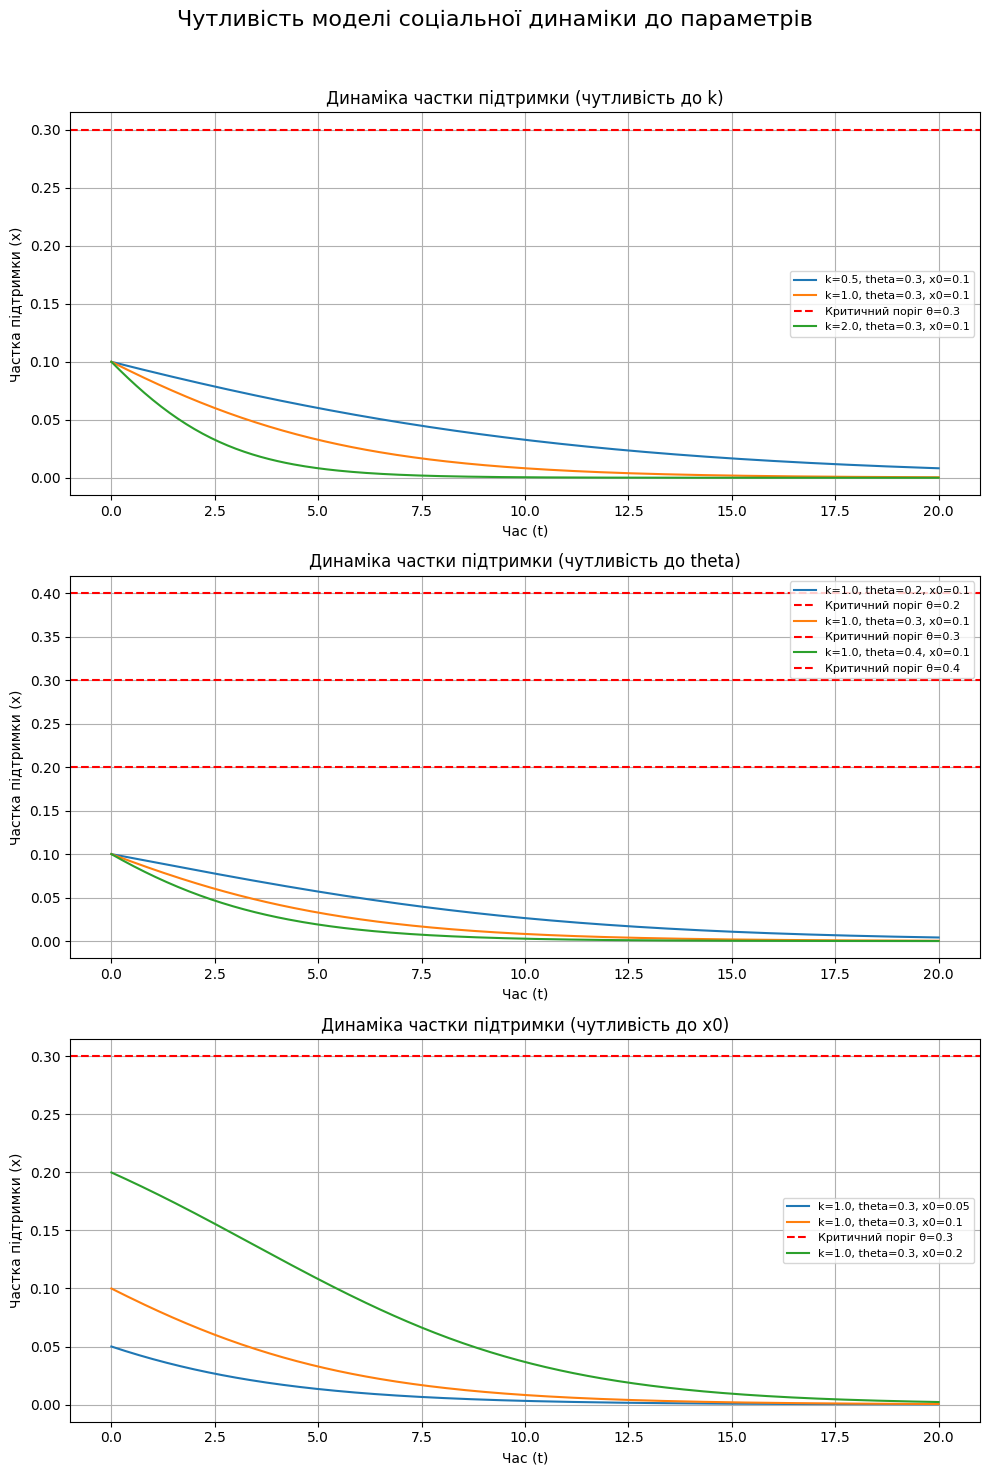

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Базові параметри моделі соціальної динаміки
base_params = {
    "k": 1.0,        # Коефіцієнт швидкості динаміки
    "theta": 0.3,    # Критичний поріг
    "x0": 0.1        # Початкова частка підтримки
}

# Проміжок часу для моделювання
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Система диференціального рівняння для моделі соціальної динаміки
def social_dynamics(t, x, k, theta):
    current_x = x[0]
    dxdt = k * current_x * (1 - current_x) * (current_x - theta)
    return [dxdt]

# Діапазони змін параметрів
param_variations = {
    "k": [0.5 * base_params["k"], base_params["k"], 2 * base_params["k"]],
    "theta": [0.2, base_params["theta"], 0.4],
    "x0": [0.05, base_params["x0"], 0.2]
}

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Чутливість моделі соціальної динаміки до параметрів", fontsize=16)

for i, (param, values) in enumerate(param_variations.items()):
    ax_time = axes[i]  # Графік динаміки

    for value in values:
        # Оновлення параметрів
        params = base_params.copy()
        params[param] = value

        # Чисельне рішення
        solution = solve_ivp(
            social_dynamics, t_span, [params["x0"]], t_eval=t_eval,
            args=(params["k"], params["theta"])
        )

        # Текст для легенди
        legend_text = (
            f"k={params['k']}, theta={params['theta']}, x0={params['x0']}"
        )

        # Графік динаміки частки підтримки
        ax_time.plot(solution.t, solution.y[0], label=legend_text)

        # Якщо аналізується \(\theta\), додаємо окремі горизонтальні лінії для кожного значення
        if param == "theta":
            ax_time.axhline(y=value, color='r', linestyle='--', label=f'Критичний поріг θ={value}')
        # Для інших параметрів додаємо одну лінію
        elif value == base_params[param]:
            ax_time.axhline(y=params["theta"], color='r', linestyle='--', label=f'Критичний поріг θ={params["theta"]}')

    # Налаштування графіку динаміки
    ax_time.set_title(f"Динаміка частки підтримки (чутливість до {param})")
    ax_time.set_xlabel("Час (t)")
    ax_time.set_ylabel("Частка підтримки (x)")
    ax_time.legend(fontsize=8)
    ax_time.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Завдання 2 \\
У моделі враховано, що пропозиція змінюється циклічно, наприклад, через сезонність виробництва чи попиту. Це відображено через коефіцієнт пропозиції, який коливається з певною періодичністю.

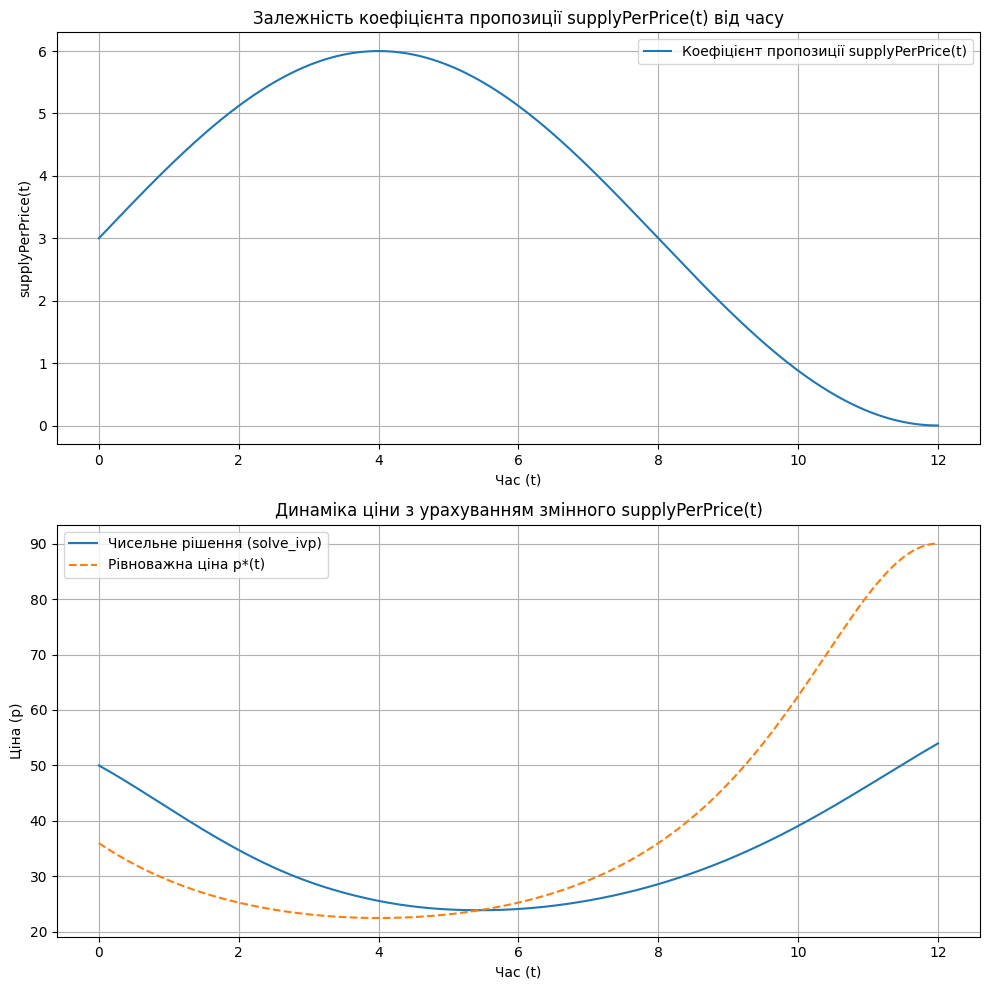

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1. Параметри моделі попиту і пропозиції
# Параметри попиту: D(p) = a - b*p
a: float = 200  # Максимальний попит при нульовій ціні
b: float = 2  # Коефіцієнт, що визначає зниження попиту при зростанні ціни

# Базова величина коефіцієнта пропозиції та період сезонності
supplyPerPrice0: float = 3  # Базовий коефіцієнт пропозиції
T: float = 12  # Період сезонності

# Інші параметри
c: float = 20  # Базова кількість товару при нульовій ціні
lambda_coef: float = 0.1  # Коефіцієнт корекції ціни
p0: float = 50  # Початкова ціна
t_span: tuple[float, float] = (0, 12)  # Проміжок часу для моделювання
t_eval: np.ndarray = np.linspace(t_span[0], t_span[1], 300)

# Функція зміни коефіцієнта пропозиції
def supplyPerPrice(t: float) -> float:
    return supplyPerPrice0 * (1 + np.sin(1.5 * np.pi * t / T))

# 2. Функції попиту та пропозиції
def demand(p: float) -> float:
    return a - b * p

def supply(p: float, t: float) -> float:
    supply_coeff = supplyPerPrice(t)
    return c + supply_coeff * p

# Функція рівноважної ціни p*(t)
def equilibrium_price(t: float) -> float:
    supply_coeff = supplyPerPrice(t)
    return (a - c) / (b + supply_coeff)

# 3. Опис диференціального рівняння для динаміки ціни
def price_dynamics(t: float, p: np.ndarray) -> np.ndarray:
    current_p: float = p[0]
    dpdt: float = lambda_coef * (demand(current_p) - supply(current_p, t))
    return np.array([dpdt])

# 4. Чисельне розв'язання рівняння динаміки ціни
solution = solve_ivp(price_dynamics, t_span, [p0], t_eval=t_eval)

# 5. Обчислення змінного коефіцієнта пропозиції та рівноважної ціни
supply_values = np.array([supplyPerPrice(t) for t in t_eval])
p_equilibrium_values = np.array([equilibrium_price(t) for t in t_eval])

# 6. Побудова графіків
plt.figure(figsize=(10, 10))

# Графік залежності supplyPerPrice(t)
plt.subplot(2, 1, 1)
plt.plot(t_eval, supply_values, label="Коефіцієнт пропозиції supplyPerPrice(t)")
plt.xlabel("Час (t)")
plt.ylabel("supplyPerPrice(t)")
plt.title("Залежність коефіцієнта пропозиції supplyPerPrice(t) від часу")
plt.legend()
plt.grid(True)

# Графік динаміки ціни
plt.subplot(2, 1, 2)
plt.plot(solution.t, solution.y[0], label="Чисельне рішення (solve_ivp)")
plt.plot(t_eval, p_equilibrium_values, '--', label="Рівноважна ціна p*(t)")
plt.xlabel("Час (t)")
plt.ylabel("Ціна (p)")
plt.title("Динаміка ціни з урахуванням змінного supplyPerPrice(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Завдання 3 \\
Модель описує взаємозв’язок між популярністю продукту. Наприклад, кількістю підписників в Лінкедін та продажами SaaS ліцензій.

Соціальна динаміка:

Якщо популярність x(t) > θ, ефект натовпу прискорює зростання.
Якщо x(t) < θ, зростання сповільнюється.
Параметр k визначає швидкість змін. \\

Попит та ціноутворення:

Попит залежить від ціни та популярності: D(p) = a - bp + αx.
Чим більше людей знають про продукт, тим вищий попит.
Ціна змінюється залежно від балансу попиту та пропозиції.
Зв’язок між змінними:

Популярність x(t) впливає на попит, а через нього — на ціну p(t).
Ціна безпосередньо не змінює популярність, але в складніших моделях може враховуватися.

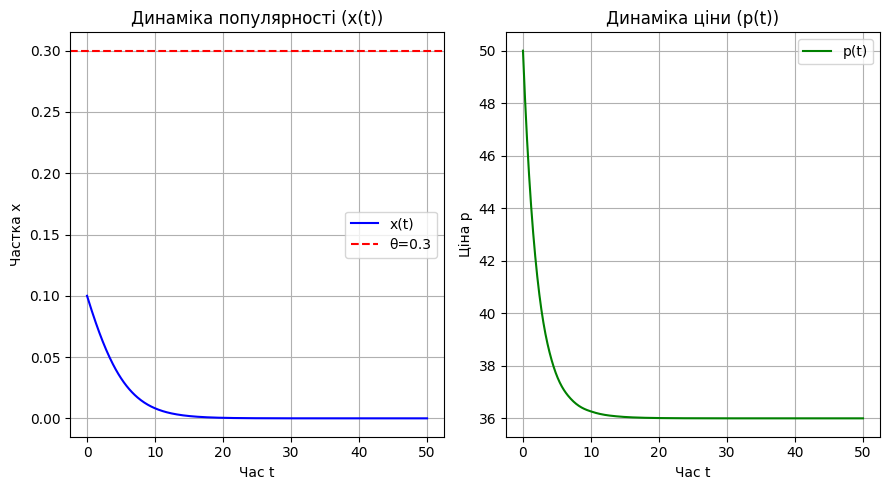

In [10]:
# 1. Імпорт бібліотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 2. Параметри соціальної динаміки
k = 1.0           # Швидкість поширення/згасання популярності
theta = 0.3       # Критичний поріг популярності
x0 = 0.1          # Початкова частка зацікавлених (підписників)

# 3. Параметри попиту-пропозиції
a = 200           # Базова складова попиту
alpha_ = 50       # Вплив популярності (x) на попит
b = 2             # Коефіцієнт зниження попиту з ростом ціни
c = 20            # Базова пропозиція
d = 3             # Коефіцієнт зростання пропозиції з ростом ціни
lambda_ = 0.1     # Швидкість корекції ціни
p0 = 50           # Початкова ціна

# 4. Функції попиту та пропозиції з урахуванням x
def demand(p: float, x: float) -> float:
    return (a + alpha_ * x) - b * p

def supply(p: float) -> float:
    return c + d * p

# 5. Загальна система ODE:
def combined_model(t, y):
    """
    y[0] = x(t) - частка популярності (соціальна динаміка)
    y[1] = p(t) - ціна (попит-пропозиція)
    """
    x, p = y

    # dx/dt - соціальна динаміка
    dxdt = k * x * (1 - x) * (x - theta)

    # dp/dt - динаміка ціни (попит-пропозиція)
    dpdt = lambda_ * ( demand(p, x) - supply(p) )

    return [dxdt, dpdt]

# 6. Час моделювання
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# 7. Чисельне розв’язання
solution = solve_ivp(combined_model, t_span, [x0, p0], t_eval=t_eval)

# Витягуємо розв’язки
x_sol = solution.y[0]   # динаміка популярності
p_sol = solution.y[1]   # динаміка ціни

# 8. Візуалізація результатів

# Графік 1: динаміка популярності (x(t))
plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)  # перший підграфік
plt.plot(solution.t, x_sol, 'b', label='x(t)')
plt.axhline(y=theta, color='r', linestyle='--', label=f'θ={theta}')
plt.title("Динаміка популярності (x(t))")
plt.xlabel("Час t")
plt.ylabel("Частка x")
plt.legend()
plt.grid(True)

# Графік 2: динаміка ціни (p(t))
plt.subplot(1, 2, 2)  # другий підграфік
plt.plot(solution.t, p_sol, 'g', label='p(t)')
plt.title("Динаміка ціни (p(t))")
plt.xlabel("Час t")
plt.ylabel("Ціна p")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
